## Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

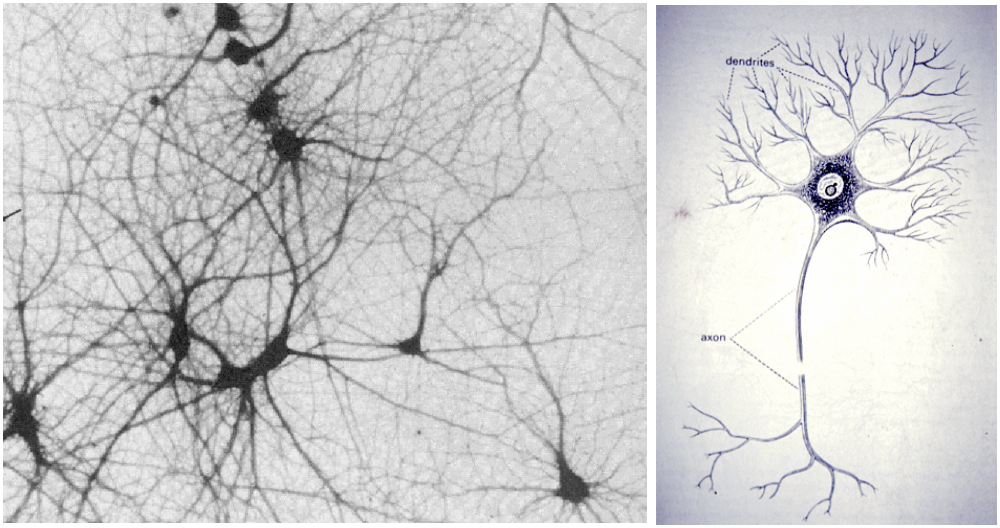

## ANN or SNN

• Изкуствените невронни мрежи (ANN) са много опростен
модел на биологичните невронни мрежи. Те са в основата
на съвременните методи на изкуствения интелект, чрез
които в последните години са постигнати забележителни
успехи

• Импулсните невронни мрежи (SNN) обхващат модели,
имитиращи невронната динамика на мозъка. В допълнение
към невронното и синаптичното състояние, SNN включват
концепцията за време в своя оперативен модел.


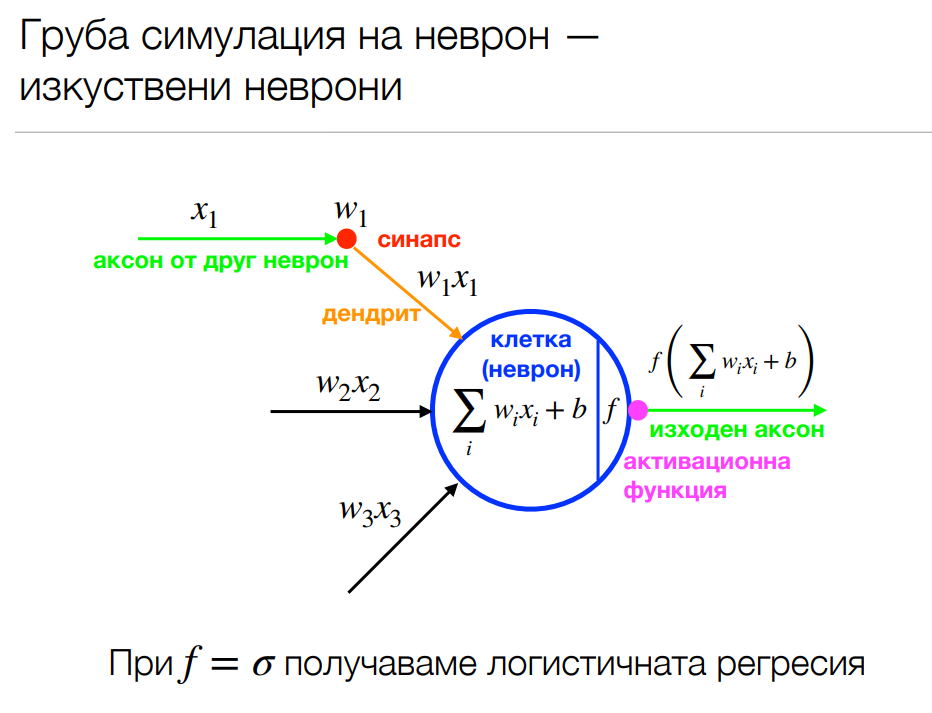

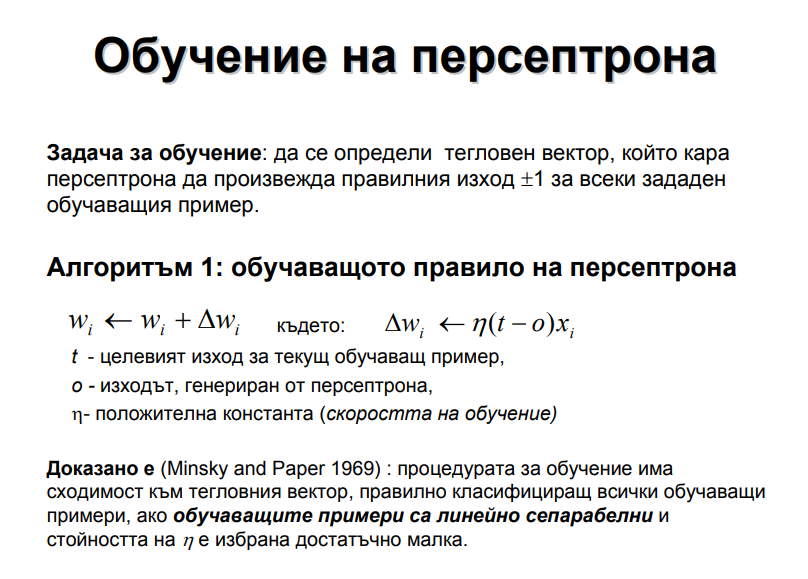

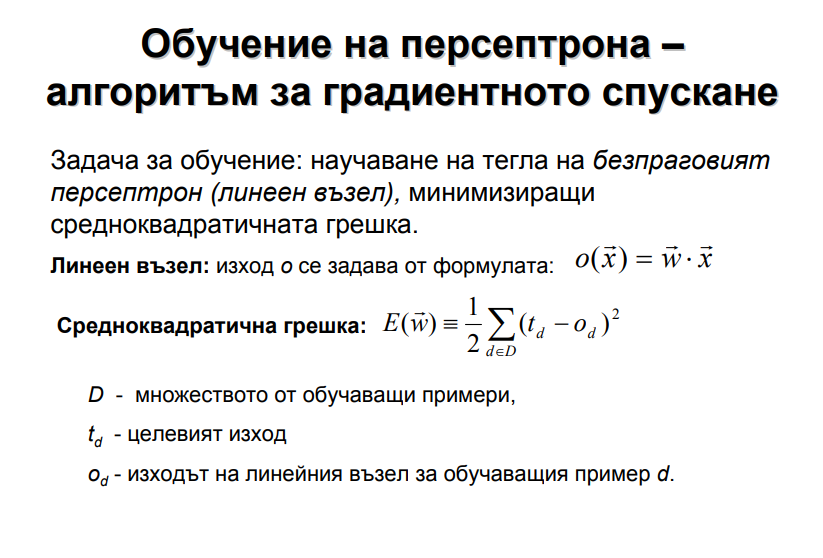

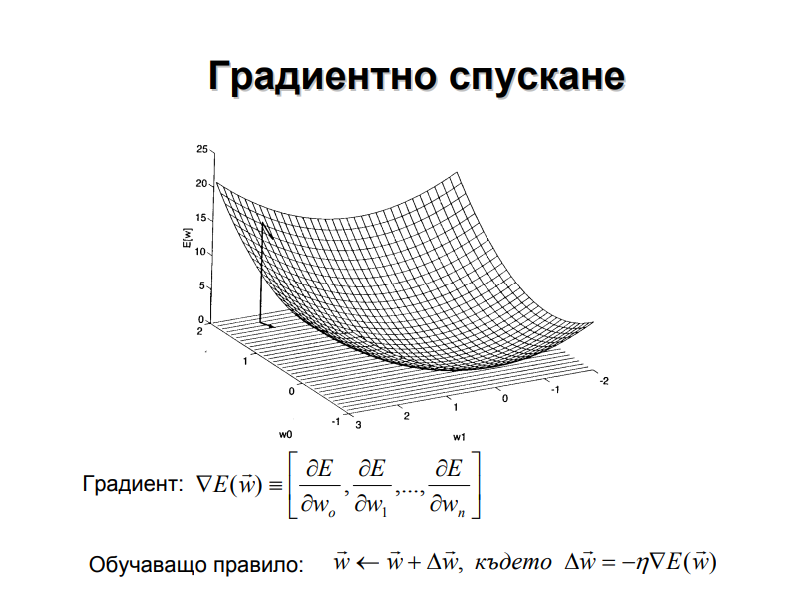

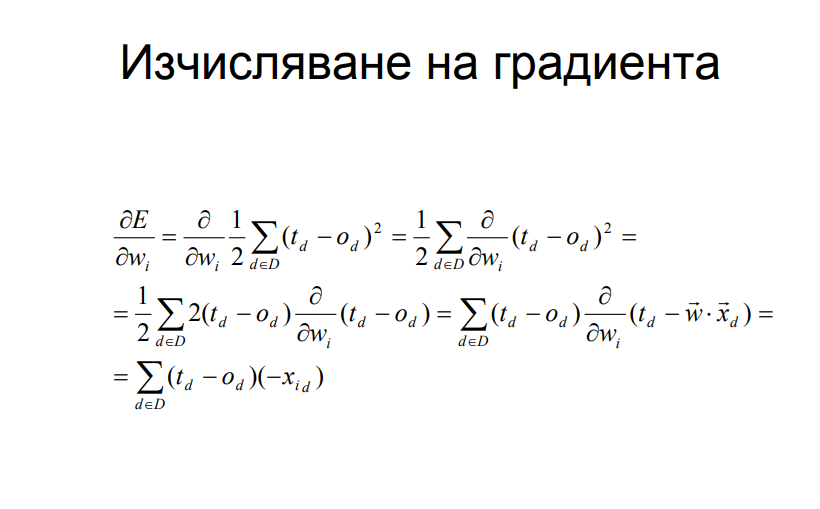

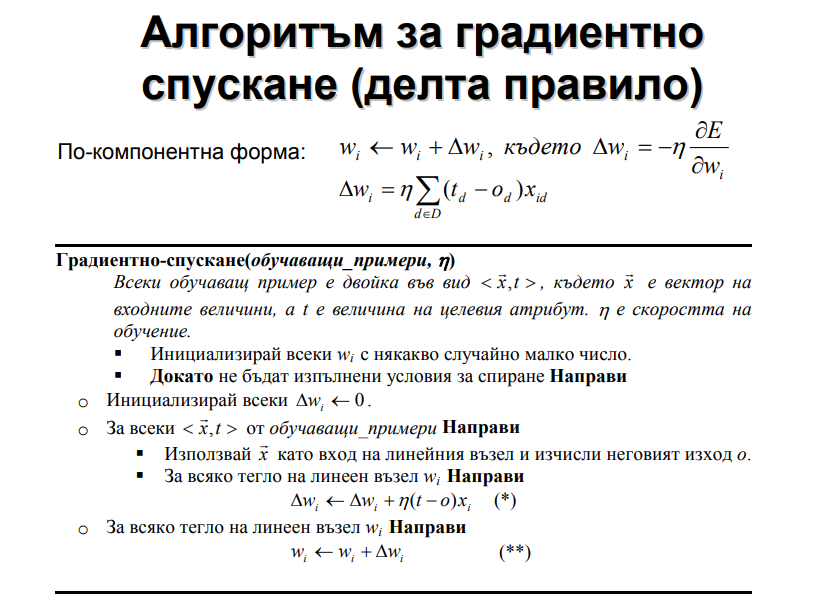

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                # y_predicted = self.sigmoid(linear_output)
                y_predicted = self.unit_step_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def sigmoid_step_func(self, x):
        return np.where(x >= 0.5, 1, 0)

    def unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        # y_logits = self.sigmoid(linear_output)
        y_predicted = self.unit_step_func(linear_output)
        return y_predicted

Perceptron classification accuracy 1.0


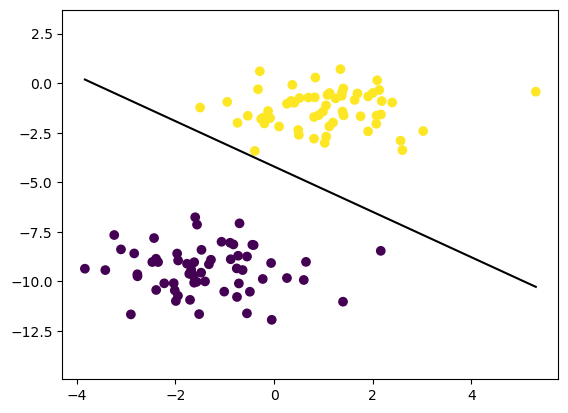

In [3]:

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(learning_rate=0.01, epochs=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

In [4]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

In [5]:
# AND
Y_and = np.array([0, 0, 0, 1])

In [6]:
p_and = Perceptron(learning_rate=0.01, epochs=1000)
p_and.fit(X, Y_and)

In [7]:
p_and.predict(X)

array([0, 0, 0, 1])

In [8]:
p_and.weights, p_and.bias

(array([0.02, 0.01]), -0.03)

In [9]:
# OR
Y_or = np.array([0, 1, 1, 1])

In [10]:
p_or = Perceptron(learning_rate=0.01, epochs=1000)
p_or.fit(X, Y_or)

In [11]:
p_or.predict(X)

array([0, 1, 1, 1])

In [12]:
p_or.weights, p_or.bias

(array([0.01, 0.01]), -0.01)

In [13]:
# XOR
Y_xor = np.array([0, 1, 1, 0])

In [14]:
p_xor = Perceptron(learning_rate=0.01, epochs=1000)
p_xor.fit(X, Y_xor)
p_xor.predict(X)

array([1, 1, 0, 0])

In [15]:
p_or.weights, p_or.bias

(array([0.01, 0.01]), -0.01)

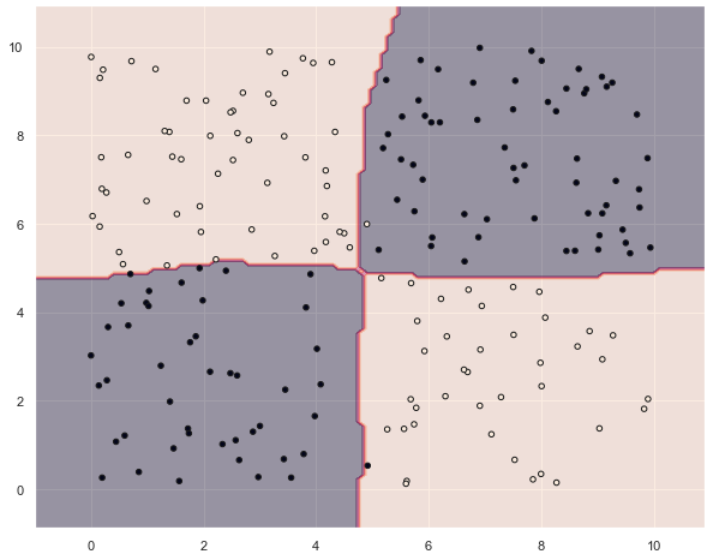

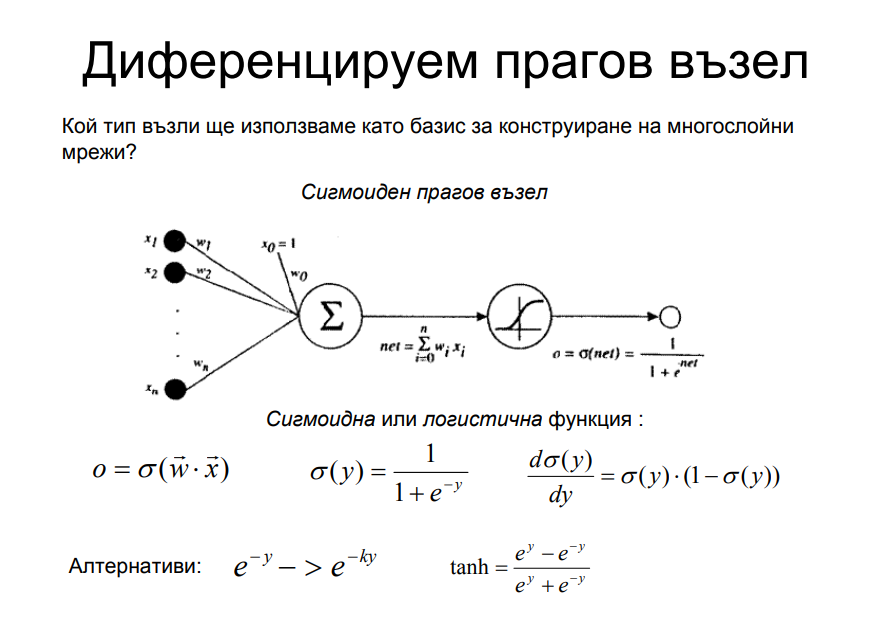

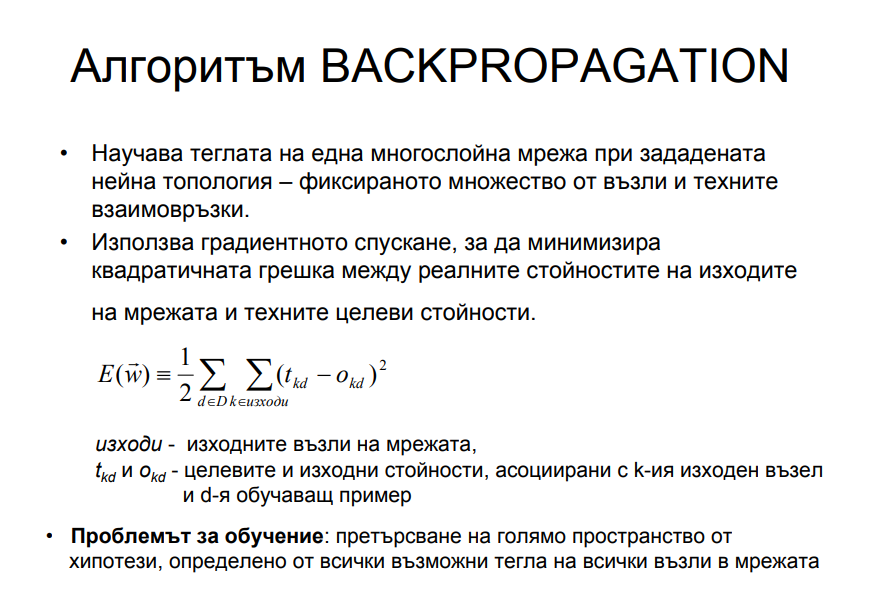

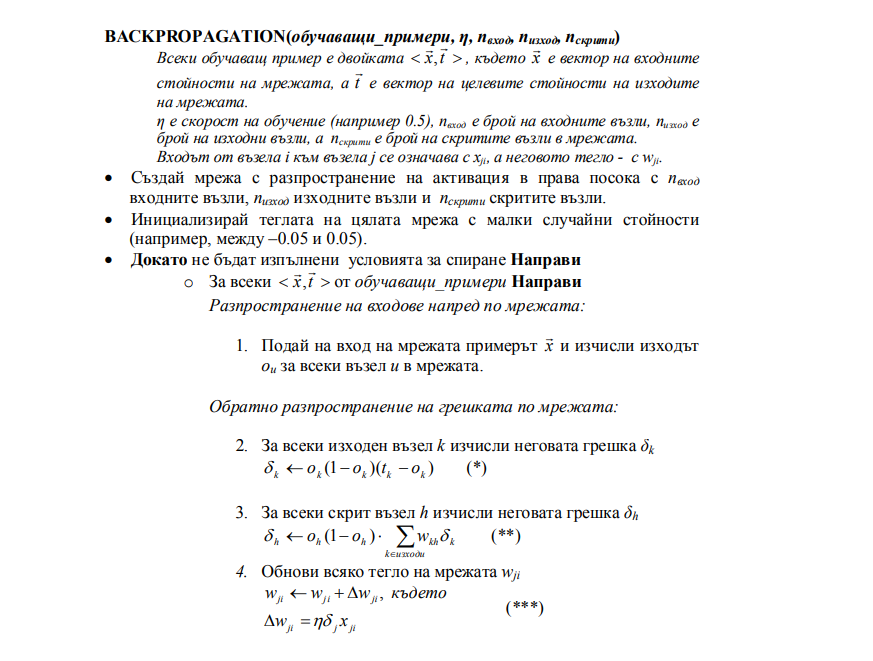

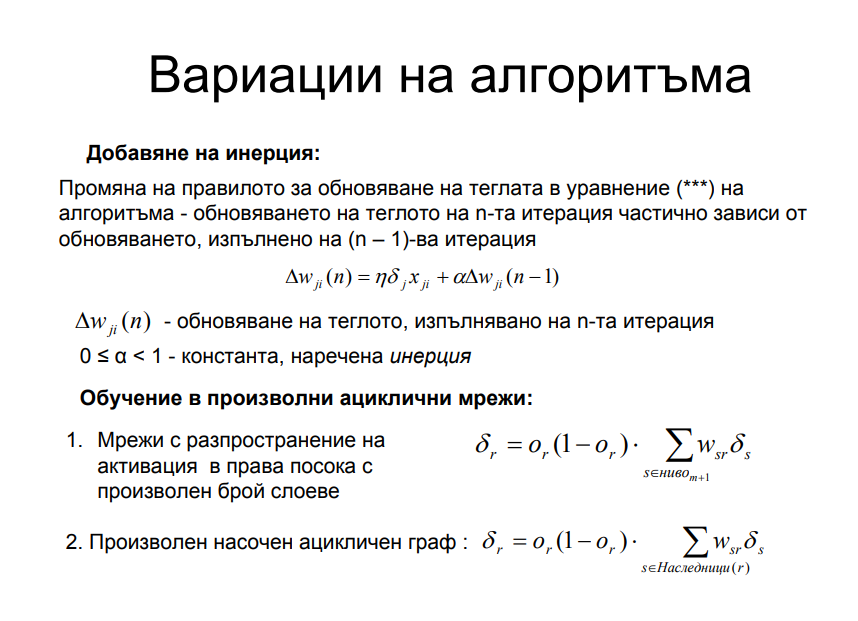

# Градиента се смята по-сложно отколкото при логистичната регресия.

Заради това ще добавим още две техники:
* Computational Graph
* Chain Rule
# Computational Graph
С графа, разделяме сметките на най-простите им компоненти. Пример:
    
$ \hat y = \sigma\big( g(x W_1 + b) W_2 + b_2\big)$
<br/>Ще го раздробим на части:
<br/>
<br/>$ op_1 = x W_1  + b $
<br/>$ op_2 = g( op_1) $
<br/>$ op_3 = op_2 * W_2 + b_2 $
<br/>$ op_4 = \sigma (op_3) $

Да добавим и грешката:
<br/>$ op_5 = J(op_4) $
# Верижно правило (Chain Rule)

"Chain rule" е фомрула за пресмятане на производните на композитни функции:


Нека $F = f ∘ g$, или $F(x) = f(g(x))$ за всяко $x$. Тогава:
$$ F'(x)=f'(g(x))g'(x) $$
или ако $ z=f(y)$ и $y=g(x) $, тогава:

$$\frac{dz}{dx}={\frac{dz}{dy}}\cdot {\frac  {dy}{dx}}$$
Тези две техники ни позволяват да намерим градиента за всяко `W` и `b`:
$$\frac{\partial}{\partial w} J(W)$$



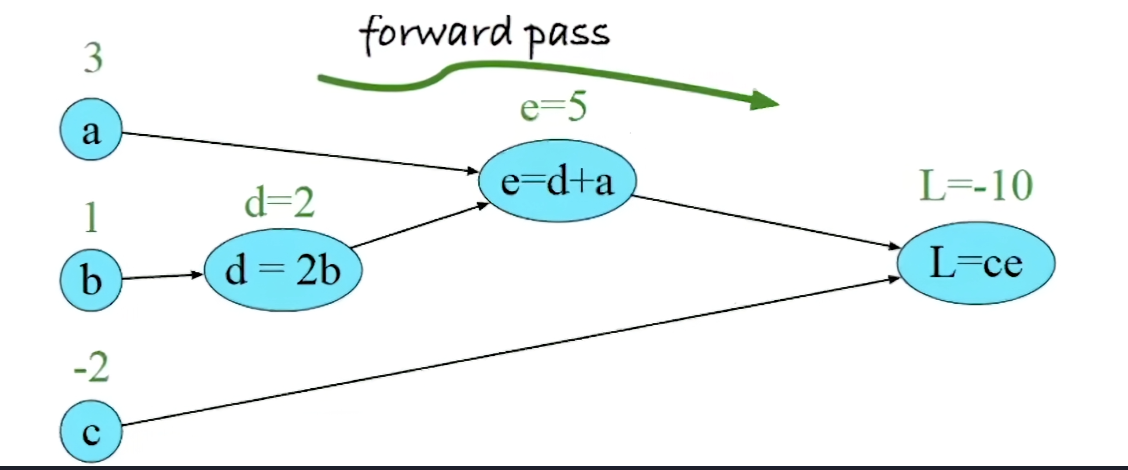

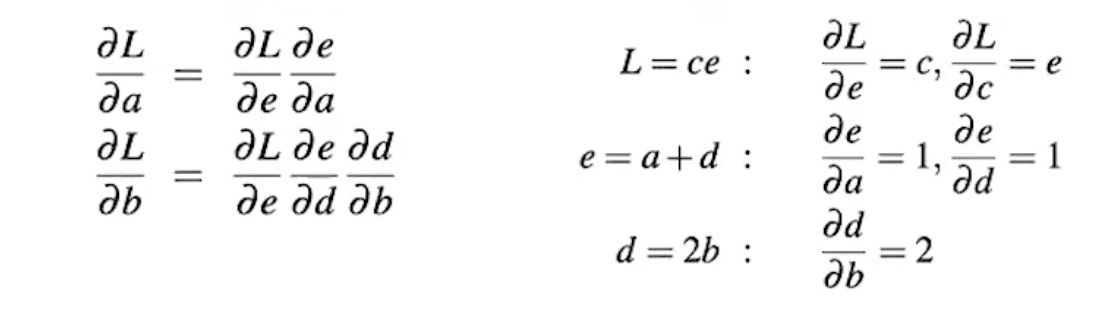

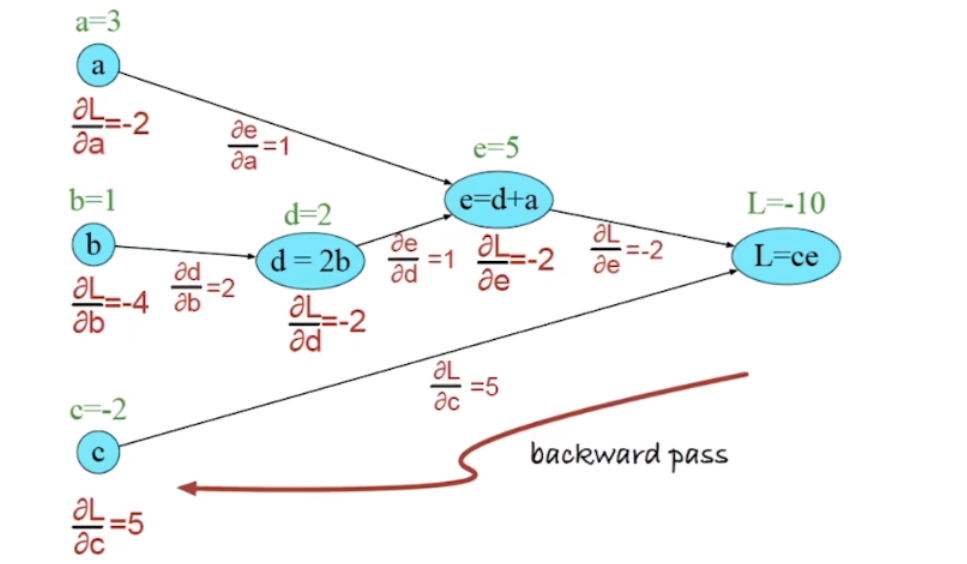

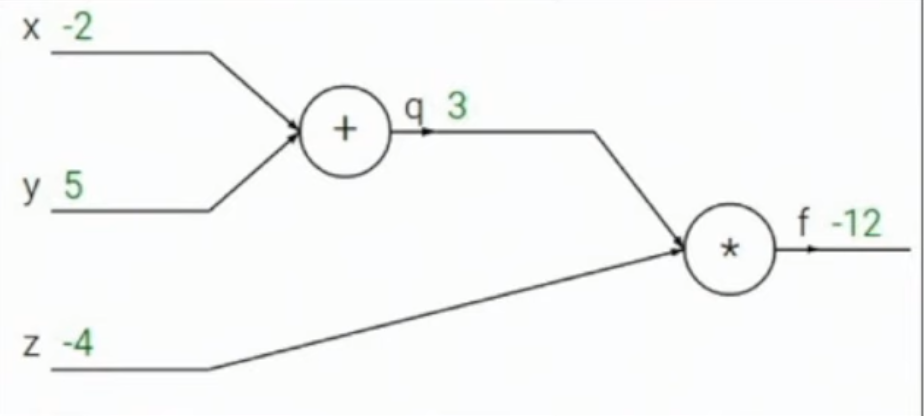

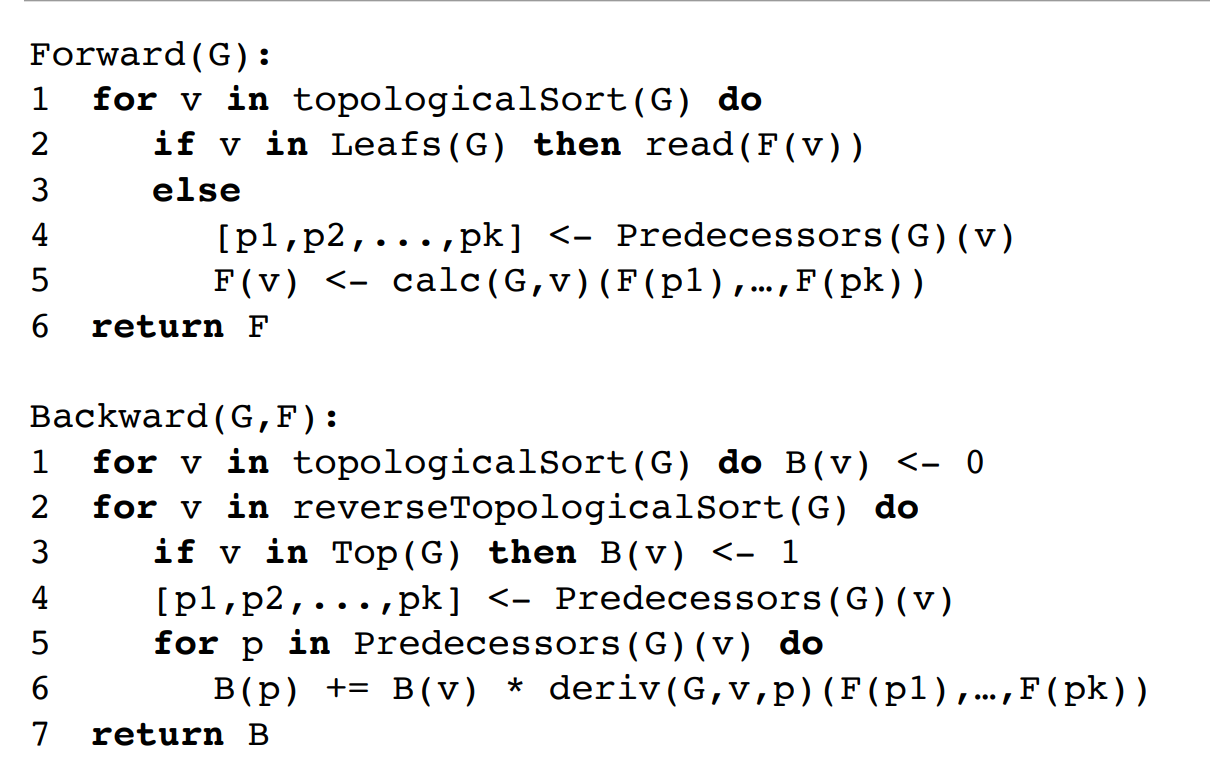